Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

In [ ]:
# Load the necessary libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Load the data from the Excel file
glass_df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Display the first few rows of the dataframe
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Exploratory Data Analysis (EDA)


In [ ]:

# Check for missing values
glass_df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
# Descriptive statistics
print(glass_df.describe())

# Check for data types
print("\
Data Types:")
print(glass_df.dtypes)

# Check for class distribution
print("\
Class Distribution:")
print(glass_df['Type'].value_counts(normalize=True))


               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

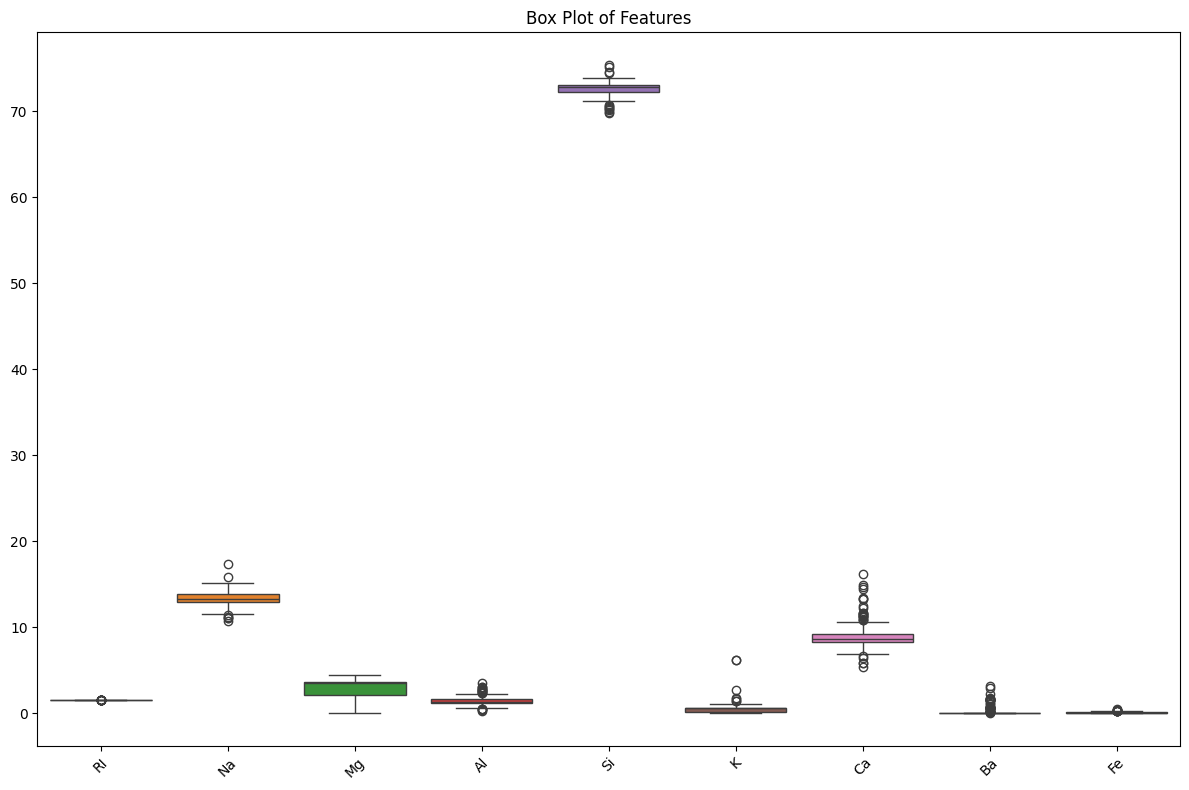

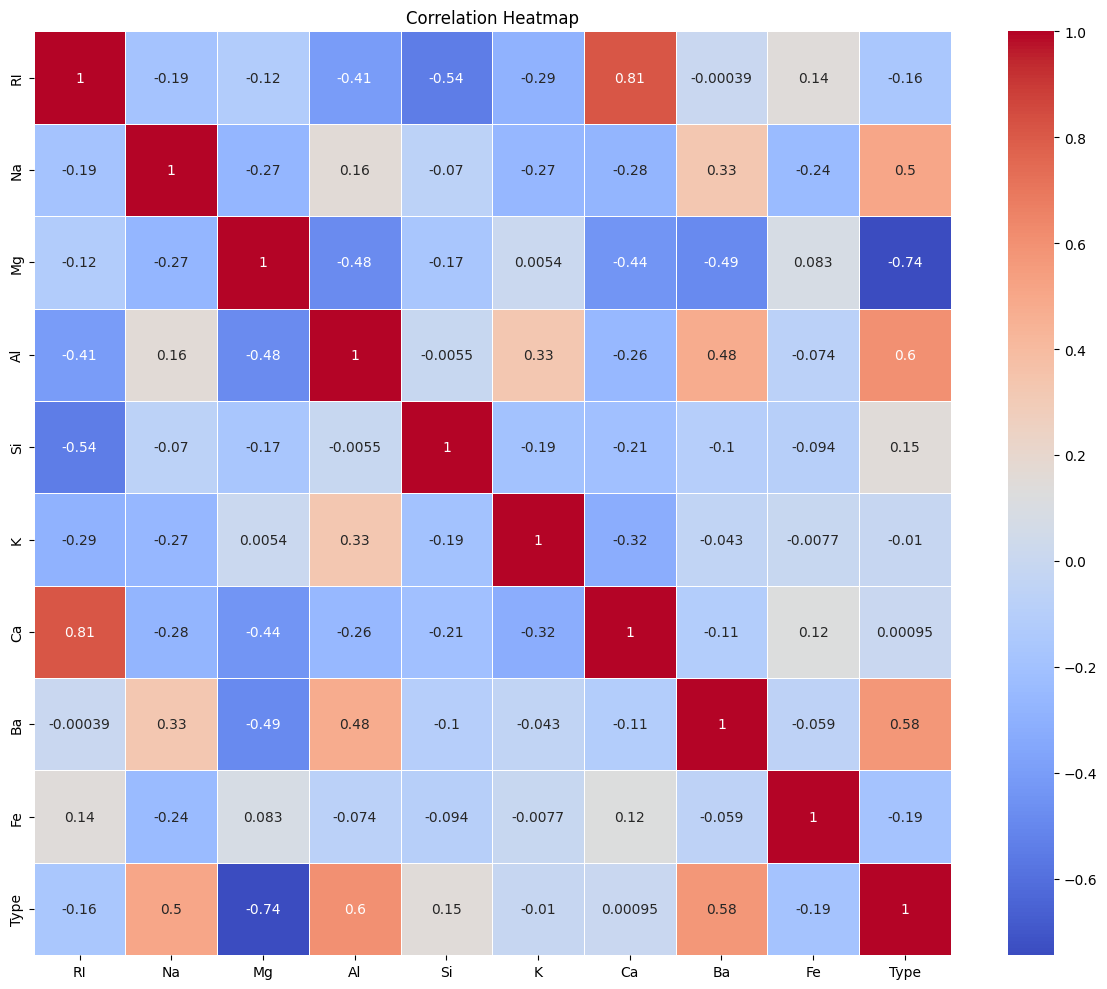

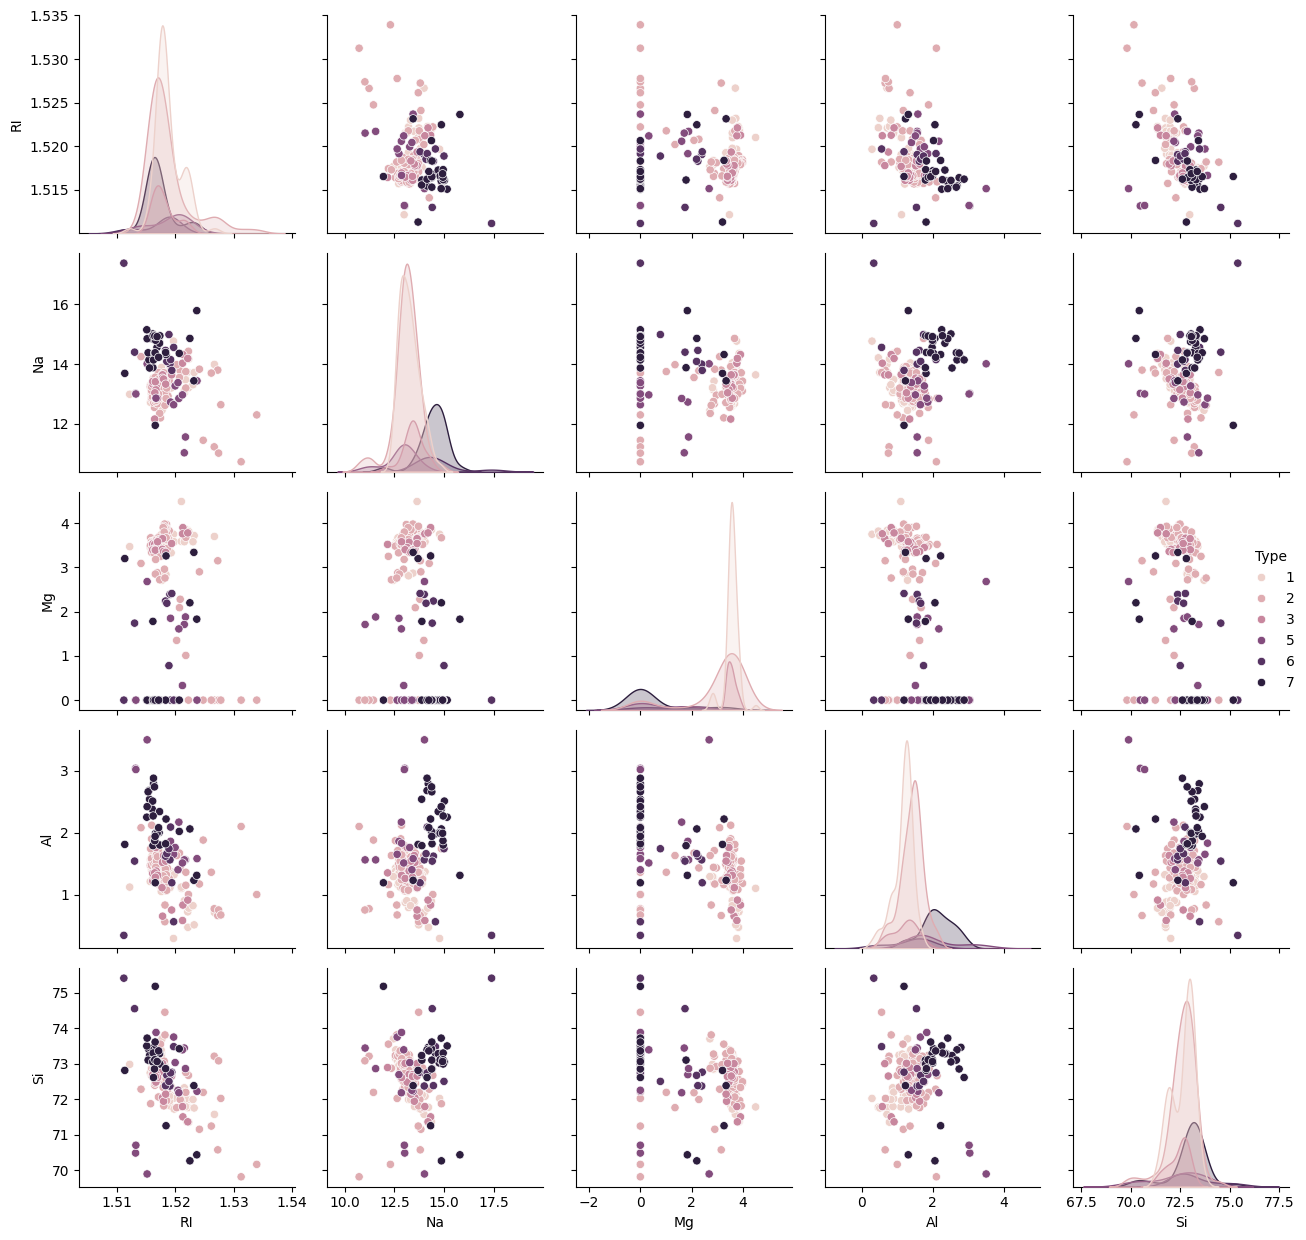

In [ ]:
# Visualizations
plt.figure(figsize=(12, 8))
sns.boxplot(data=glass_df.drop('Type', axis=1))
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(glass_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Pair plot for selected features
sns.pairplot(glass_df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Type']], hue='Type')
plt.tight_layout()
plt.show()


## Data Preprocessing

In [ ]:
# Separate features and target
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (364, 9)
x_test (92, 9)
y_train (364,)
y_test (92,)


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Train and evaluate random forest classifier
rf_pred = rf_model.predict(X_test) # Make predictions using the trained model and store it in rf_pred
print("\nRandom Forest Classification Report:") # Print the classification report
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92



In [ ]:
# Train and evaluate Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [ ]:

bagging_pred = bagging_model.predict(X_test)
print("\
Bagging Classifier Classification Report:")
print(classification_report(y_test, bagging_pred))


Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92



In [ ]:
# Train and evaluate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:

gb_pred = gb_model.predict(X_test)
print("\
Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       1.00      0.89      0.94        19
           3       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



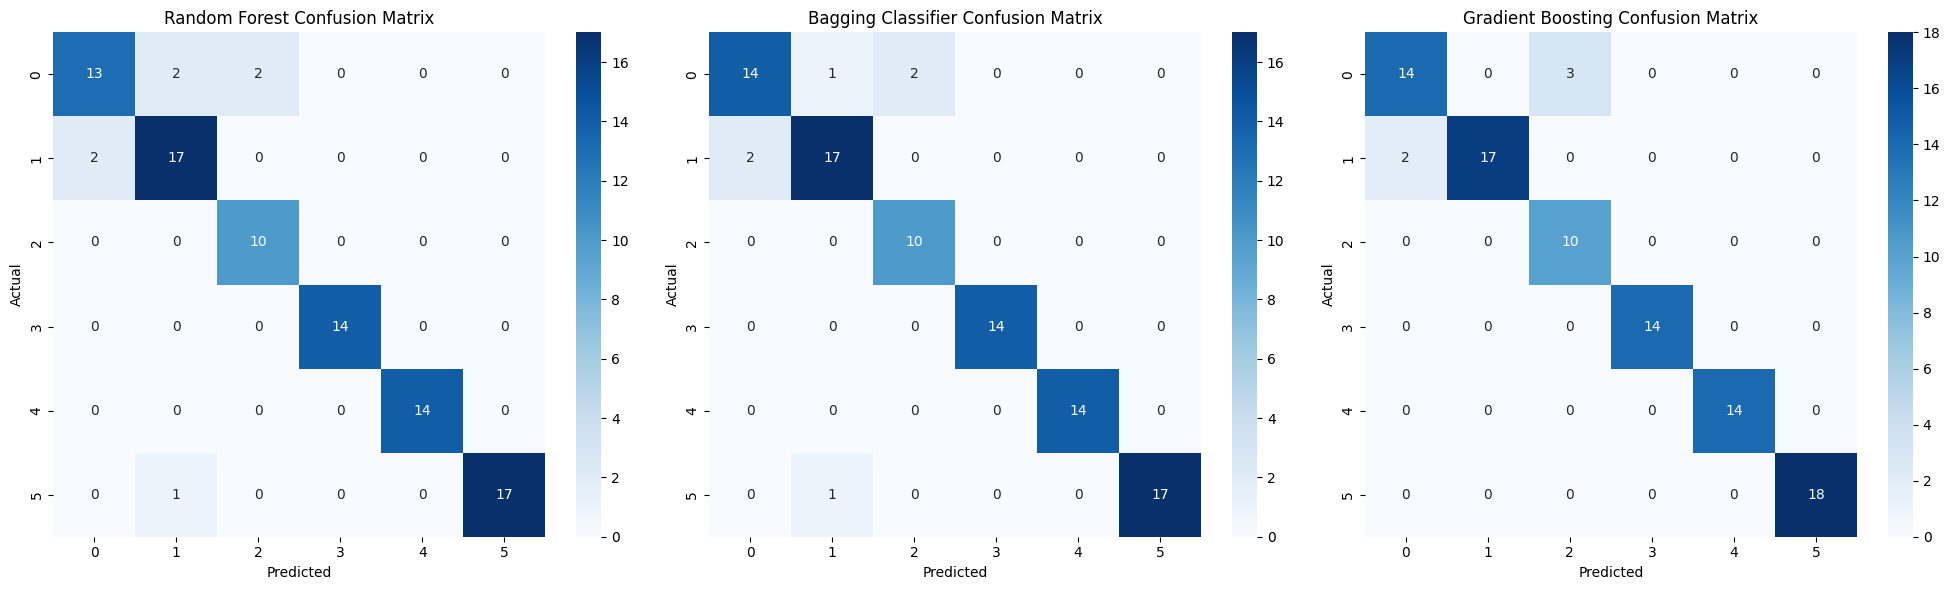

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, bagging_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Bagging Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()



### Bagging and Boosting

**Bagging (Bootstrap Aggregating):**
- Bagging is an ensemble method that aims to improve the stability and accuracy of machine learning algorithms.
- It works by training multiple models (often the same type) on different subsets of the training data, created by bootstrapping (random sampling with replacement).
- The final prediction is made by averaging the predictions (for regression) or taking a majority vote (for classification) from all models.
- Bagging reduces variance and helps prevent overfitting.

**Boosting:**
- Boosting is another ensemble method that focuses on converting weak learners into strong ones.
- It trains models sequentially, where each new model attempts to correct the errors made by the previous ones.
- The final prediction is a weighted sum of the predictions from all models.
- Boosting reduces both bias and variance, often leading to better performance than bagging.

**Differences:**
- Bagging trains models independently, while Boosting trains models sequentially.
- Bagging reduces variance, whereas Boosting reduces both bias and variance.
- Bagging uses simple averaging or voting, while Boosting uses a weighted approach.

### Handling Imbalanced Data

Imbalanced data occurs when the classes in a dataset are not represented equally. Here are some strategies to handle it:

1. **Resampling Techniques:**
   - **Oversampling:** Increase the number of instances in the minority class by duplicating them or generating synthetic samples (e.g., using SMOTE).
   - **Undersampling:** Reduce the number of instances in the majority class by randomly removing samples.

2. **Algorithmic Approaches:**
   - Use algorithms that are robust to class imbalance, such as decision trees or ensemble methods like Random Forests and Gradient Boosting.

3. **Cost-sensitive Learning:**
   - Modify the learning algorithm to give more importance to the minority class by adjusting the class weights.

4. **Evaluation Metrics:**
   - Use metrics that are suitable for imbalanced data, such as precision, recall, F1-score, and the area under the ROC curve (AUC-ROC), instead of accuracy.

These methods help in improving the model's performance on imbalanced datasets by ensuring that the minority class is adequately represented and considered during training.